# Préambule : régression linéaire, régression ridge et LASSO

In [1]:
import numpy as np
def load_usps(filename ):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2] 
    tmp = np.array(data)
    return tmp[: ,1:] ,tmp[: ,0]. astype(int)
trainx , trainy = load_usps ("USPS/USPS_train.txt")
testx , testy = load_usps ("USPS/USPS_test.txt")

In [3]:
ind12,  = np.where((trainy > 0) & (trainy <3))
trainy12  = trainy[ind12]
trainy12  = np.where(trainy12 > 1 , 1., -1.) # transformation des étiquettes en {0, 1}
trainx12  = trainx[ind12]

bias=np.ones((1,len(trainx12)))
trainx12=np.concatenate((bias.T,trainx12), axis=1)

ind12,  = np.where((testy > 0) & (testy <3))
testy12  = testy[ind12]
testy12  = np.where(testy12 > 1 , 1., -1.) # transformation des étiquettes en {0, 1}
testx12  = testx[ind12]

bias=np.ones((1,len(testx12)))
testx12=np.concatenate((bias.T,testx12), axis=1)

# Régression linéaire

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score


In [59]:
import matplotlib.pyplot as plt
def courbes(trainx , trainy,testx,testy,model,title):
    li=[]
    train_scores=[]
    test_scores=[]
    n=len(np.unique(trainy))
    proba=dict()
    for i in  range(n-1):
        trainy  = np.where(trainy ==i , 1., -1.) # transformation des étiquettes en {0, 1}
        trainx  = trainx.copy()
        bias=np.ones((1,len(trainx)))
        trainx=np.concatenate((bias.T,trainx), axis=1)
        testy  = np.where(testy ==i , 1., -1.) # transformation des étiquettes en {0, 1}
        testx  = testx.copy()
        bias=np.ones((1,len(testx)))
        testx=np.concatenate((bias.T,testx), axis=1)
        model.fit(trainx,trainy)
        li.append(i)        
        y_pred = model.predict(trainx)
        y_pred = np.sign(y_pred)
        train_scores.append(r2_score(trainy,y_pred)) 
        y_pred = model.predict(testx)
        y_pred = np.sign(y_pred)
        test_scores.append(r2_score(testy,y_pred))  
    plt.plot(li,test_scores,label="Test")
    plt.plot(li,train_scores,label="Train")
    plt.legend()
    plt.title(title)
    plt.xlabel("Classe i contre les autres")
    plt.ylabel("Pourcentage de bonne classification")
    plt.show()  

In [60]:

linReg = LinearRegression(normalize=True)
linReg.fit(trainx12,trainy12)
y_pred = linReg.predict(testx12)
y_pred = np.sign(y_pred)
print("Pourcentage de bonne classification en test :",r2_score(testy12,y_pred))

Pourcentage de bonne classification en test : 0.9381313131313131


In [61]:
NbnulCoef = len(np.where (linReg.coef_==0)[0])
print("Nombre de composantes nulles :",NbnulCoef)

Nombre de composantes nulles : 0


In [62]:
from numpy import linalg as LA

In [63]:
print("Norme du vecteur W :",LA.norm(linReg.coef_))

Norme du vecteur W : 2571082336804.7944


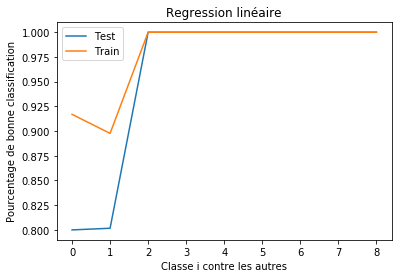

In [64]:
courbes(trainx , trainy,testx,testy,linReg,"Regression linéaire")

# Régression ridge

In [65]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(trainx12, trainy12) 
y_pred = ridge.predict(testx12)
y_pred = np.sign(y_pred)
print("Pourcentage de bonne classification en test :",r2_score(testy12,y_pred))


Pourcentage de bonne classification en test : 0.946969696969697


In [20]:
def predict_via_one_vs_one(x,trainx , trainy,model):
    n=len(np.unique(trainy))
    proba=dict()
    for i in  range(n-1):
        for j in range(i+1,n):
            #print(i,j)
            #train
            ind,  = np.where((trainy ==i) | (trainy ==j))
            dy  = trainy[ind]
            dy2  = np.where(dy ==i , 1., -1.) # transformation des étiquettes en {0, 1}
            dx  = trainx[ind]
            #print(len(datax),len(datay))
            #Ajout du biais 
            bias=np.ones((1,len(dx)))
            dx=np.concatenate((bias.T,dx), axis=1)
            #apprentissage sur les donnée train
            model.fit(dx,dy2)
            pr=model.predict_proba(x.reshape(1, -1))[0]
            if pr[1]>=pr[0]:
                cl_max,pr_max=i,pr[1]
            else:
                cl_max,pr_max=j,pr[0]
            proba[cl_max]=pr_max
    d=sorted(proba.items(), key=lambda t: t[1]) 
    return d[len(d)-1]

In [66]:
NbnulCoef = len(np.where (ridge.coef_==0)[0])
print("Nombre de composantes nulles :",NbnulCoef)

Nombre de composantes nulles : 3


In [67]:
print("Norme du vecteur W :",LA.norm(ridge.coef_))

Norme du vecteur W : 0.8622549684103873


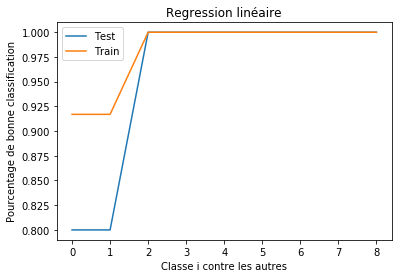

In [58]:
courbes(trainx , trainy,testx,testy,ridge,"Régression ridge")

# LASSO

In [68]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(trainx12, trainy12)
y_pred = lasso.predict(testx12)
y_pred = np.sign(y_pred)
print("Pourcentage de bonne classification en test :",r2_score(testy12,y_pred))


Pourcentage de bonne classification en test : 0.9558080808080808


In [69]:
NbnulCoef = len(np.where (lasso.coef_==0)[0])
print("Nombre de composantes nulles :",NbnulCoef)

Nombre de composantes nulles : 132


In [71]:
print("Norme du vecteur W :",LA.norm(lasso.coef_))

Norme du vecteur W : 0.4287919671724487


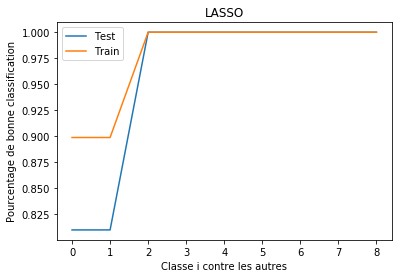

In [72]:
courbes(trainx , trainy,testx,testy,lasso,"LASSO")

## Analyse des résultats obtenus :

On remarque que le nombre de composantes nulles du vecteur "W" est nul avec la régression linéaire , 3 avec la régression ridge et 132 avec le LASSO 

De plus la norme de "w" est très grande avec la régression linéaire , petite avec la régression ridge et encore la moitié de celle là avec le LASSO

Il y a en effet un lien direct entre le nombre de composantes nulles et la norme du vecteur "W" , car plus il a moins de composantes nulles,plus sa norme est grande 

En effet, la régularisation réduit considérablement la norme du vecetur "W"

# Inpainting

In [12]:
import matplotlib.pyplot as plt
import matplotlib 
from random import randint
from math import *
import copy 

# Définition des fonctions primaires 

In [13]:
def read_im(fn):
    im=plt.imread(fn)   
    im= (im - im.min())/im.ptp()
    im=matplotlib.colors.rgb_to_hsv(im)
    return im

In [14]:
def show_im(im):
    plt.imshow(im)

In [15]:
def patch_to_vec(patch): 
    return patch.reshape(patch.shape[0]*patch.shape[1]*3)
def vec_to_patch(vec): 
    h = int(sqrt(len(vec)/3))
    return vec.reshape(h,h,3)

In [16]:
def noise(im,prc):
    img = copy.deepcopy(im) 
    nbPixelToDel = int(len(img)*len(img[0])*prc/100)
    for i in range (nbPixelToDel+1):
        pi = randint(0,len(img)-1)
        pj = randint(0,len(img[0])-1)
        img[pi][pj] = np.array([-100,-100,-100])
    return img

In [17]:
def delete_rect(img, i, j, height, width):
    for pi in range(i, i+width):
        for pj in range (j, j+height):
            img[pi][pj] = np.array([-100,-100,-100])
    return img

In [417]:
def get_patch(i,j,h,im):
    patch = []   
    if (round(i+h/2) > len(im)): 
        infi = round(i+h/2) - len(im)-h
    else :
        infi =  max (0,round(i-h/2))     
    if (round(j+h/2) > len(im[0])): 
        infj = round(j+h/2) - len(im[0]) -h 
    else :
        infj =  max (0,round(j-h/2))
    for starti in range ( infi ,infi+h):
        for startj in range (infj, infj+h):
            patch.append(im[starti][startj])
    return np.asarray(patch).reshape((h,h,3))

In [418]:
def get_patches(img,h):
    miss = np.array([-100,-100,-100])
    patches_missing = dict()
    patches_complete = dict()
    #On fera en sorte de prendre toujours des h pairs 
    if h%2 != 0 :
        h= h-1
    for i in range (0,len(img)+1,h):
        for j in range(0,len(img[0])+1,h):
            ci, cj = int(i+(h/2)) , int(j+(h/2)) 
            p = get_patch(ci,cj,h,img)
            if miss in p : 
                patches_missing[(ci,cj)]=p
            else :
                patches_complete[(ci,cj)]=p
    return patches_missing, patches_complete

In [419]:
def approximer(patch, patches_complete):   
#La fonction qui approxime les meilleurs paramètres pour un patch 
#En utilisant l'algorithme Lasso 

#Construire Ip et IpB :
    IpB =[]
    Ip = []
    y = []
    X =[]
    
    for index, element in np.ndenumerate(patch): 
        if(element != -100): 
            IpB.append(index)
            y.append(element)
        else:
            Ip.append(index)
     
    y= np.asarray(y)
    #print(y)
    #print("Y shape: ",y.shape[0])
    #print("ipb========>",IpB)
    for (i,j,l) in IpB: 
        #print("triple",(i,j,l))
        for k in  patches_complete.keys() :
            pk = patches_complete[k]
            X.append(pk[i][j][l])
    X = np.asarray(X)
    #print(X)
    #print("X shape: ",X.shape)
    #print(y.shape[0])
    if (y.shape[0]==0): 
        print ("Attention à votre quadrillage, le patch passé en paramètre est carrément bruité")
        return 
    Xnorm = X.reshape( y.shape[0],int(X.shape[0] / y.shape[0]) )
    lasso = linear_model.Lasso(alpha=0.01)
    lasso.fit(Xnorm, y)

    #print("len coeff", len(lasso.coef_))

    
    Xp = []
    for (i,j,l) in Ip: 
        #print("triple",(i,j,l))
        for k in  patches_complete.keys() :
            pk = patches_complete[k]
            Xp.append(pk[i][j][l])
    Xp = np.asarray(Xp)
    #print(X)
    #print("X shape: ",X.shape)
    Xpnorm = Xp.reshape(len(Ip),int(Xp.shape[0] / len(Ip)) )
    
    
    # complétion 
    yhat = []
    i=0
    for index, element in np.ndenumerate(patch): 
        if(element != -100): 
            yhat.append(element)
        else:
            yhat.append(Xpnorm[i].dot(lasso.coef_))
            #print("ind===========>",index)
            #print("yhat==========>",Xpnorm[i].dot(lasso.coef_))
            i+=1
  

    yhat = np.asarray(yhat)
    yhat = yhat.reshape(patch.shape[0],patch.shape[1],3)
    return yhat
    
    

In [420]:
def reconstituer(completed_patches, im):
    #Reconstitution de l'image après approxiamtion des patchs. 
    
    img = copy.deepcopy(im)
    
    for k in completed_patches.keys() : 
        patch = completed_patches[k]
        h = patch.shape[0]
        ci,cj = k 
        i = 0
        
        for istart in range ( max (0,round(ci-h/2)) ,min(round(ci+h/2),len(img))):
            j = 0
            for jstart in range (max (0, round(cj-h/2)), min( round(cj+h/2),len(im[0]))):
                #print(patch[i][j])
                img[istart][jstart] = patch[i][j]
                j+=1
                b=jstart
            i+=1
            a=istart
   
    return img 

## Débruiter une image avec un apprentissage simple

In [422]:
#Fonction de débruitage simple 
def inpainting(patches_missing, patches_complete): 
    completed_patches = {}
    for key in patches_missing.keys():
        #print(i)
        patch = patches_missing[key]
        completed_patches[key]=approximer(patch, patches_complete)
    return completed_patches



### Exemple 1 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pourcentage de bruit=  1
h=  20
Nombre de patchs ayant des pixels manquants:  4285
Nombre de patchs complets:  71


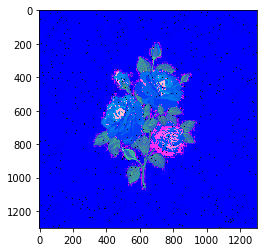

In [421]:
pourcentage = 1 
h = 20 
im=read_im('im3.jpg')
img = noise(im,pourcentage)
show_im(img)
patches_missing, patches_complete = get_patches(img,h)
print("Pourcentage de bruit= ",pourcentage)
print("h= ",h)
print("Nombre de patchs ayant des pixels manquants: ",len(patches_missing))
print("Nombre de patchs complets: ",len(patches_complete))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Résultat: 


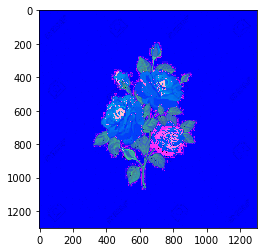

In [423]:
completed_patches = inpainting(patches_missing, patches_complete)
imgR = reconstituer(completed_patches, im)
print("Résultat: ")
show_im(imgR)

##### Verification qu'il ne reste aucun pixel bruité dans l'image: 

In [425]:
a  = img.reshape(img.shape[0]*img.shape[1]*img.shape[2])
print("Initialement l'image avait "+str(len(np.where(a==-100)[0])/3)+" pixels bruités")
b  = imgR.reshape(imgR.shape[0]*imgR.shape[1]*imgR.shape[2])
print("L'image reconstuite a "+str(len(np.where(b==-100)[0])/3)+" pixels bruités")

Initialement l'image avait 16806.0 pixels bruités
L'image reconstuite a 0.0 pixels bruités


### Exemple 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pourcentage de bruit=  1
h=  20
Nombre de patchs ayant des pixels manquants:  584
Nombre de patchs complets:  16


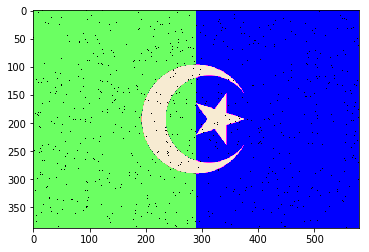

In [426]:
pourcentage = 1 
h = 20 
im=read_im('dz.png')
img = noise(im,pourcentage)
show_im(img)
patches_missing, patches_complete = get_patches(img,h)
print("Pourcentage de bruit= ",pourcentage)
print("h= ",h)
print("Nombre de patchs ayant des pixels manquants: ",len(patches_missing))
print("Nombre de patchs complets: ",len(patches_complete))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


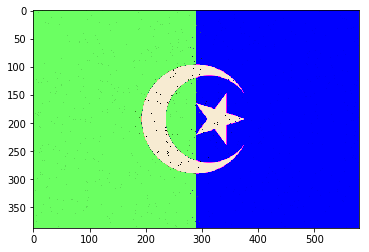

In [427]:
completed_patches = inpainting(patches_missing, patches_complete)
imgR = reconstituer(completed_patches, im)
show_im(imgR)

#### Verification qu'il ne reste aucun pixel bruité dans l'image: 

In [429]:
a  = img.reshape(img.shape[0]*img.shape[1]*img.shape[2])
print("Initialement l'image avait "+str(len(np.where(a==-100)[0])/3)+" pixels bruités")
b  = imgR.reshape(imgR.shape[0]*imgR.shape[1]*imgR.shape[2])
print("L'image reconstuite a "+str(len(np.where(b==-100)[0])/3)+" pixels bruités")

Initialement l'image avait 2233.0 pixels bruités
L'image reconstuite a 0.0 pixels bruités


### Application du même algorithme sur une image dont toute une partie qui est bruitée

### Exemple 1 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


h=  150
Nombre de patchs ayant des pixels manquants:  4
Nombre de patchs complets:  8


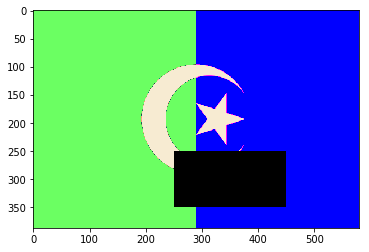

In [431]:
h=150
im=read_im('dz.png')
delete_rect(im,250,250,200,100)
show_im(im)
patches_missing, patches_complete = get_patches(im,h)
print("h= ",h)
print("Nombre de patchs ayant des pixels manquants: ",len(patches_missing))
print("Nombre de patchs complets: ",len(patches_complete))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Résultat


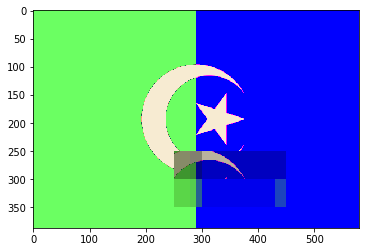

In [433]:
completed_patches = inpainting(patches_missing, patches_complete)
imgR = reconstituer(completed_patches, im)
show_im(imgR)
print("Résultat")

On voit vraiment que le résultat était très impréssionant, l'algorithme a su détécter les formes. 

### Exemple 2 

Dans cette exemple essayons de supprimer une partie d'une image (donnons du sens à notre application)

Soit l'image initiale l'image suivante

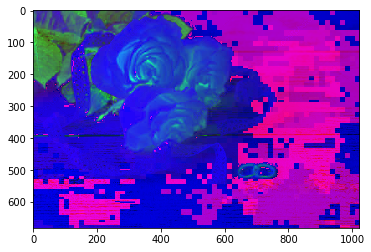

In [436]:
im=read_im('roses.jpg')
show_im(im)

On veut enlever les bagues de cette image. D'abord cachons les: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


h=  150
Nombre de patchs ayant des pixels manquants:  2
Nombre de patchs complets:  33


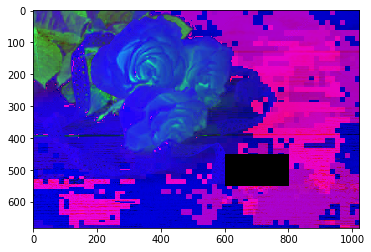

In [439]:
h = 150 
im=read_im('roses.jpg')
delete_rect(im,450,600,200,100)
show_im(im)
patches_missing, patches_complete = get_patches(im,h)
print("h= ",h)
print("Nombre de patchs ayant des pixels manquants: ",len(patches_missing))
print("Nombre de patchs complets: ",len(patches_complete))

Reconstituons l'image : 

Résultat:


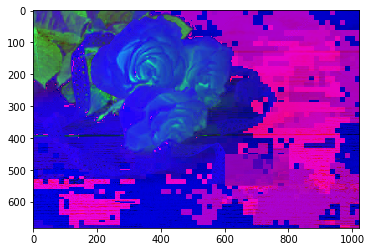

In [440]:
completed_patches = inpainting(patches_missing, patches_complete)
imgR = reconstituer(completed_patches, im)
print("Résultat:")
show_im(imgR)

La partie reconstituée est presque invisible. 

## Débruiter une image avec un apprentissage suivant un ordre (des bords vers le centre) 

In [195]:

#La fonction qui ordonne les patchs de telle sorte ou elle donne les patchs 
#les plus proches des bords de l'image (indice par indice)
#a étant la liste de tous les patchs ayant des pixels manquants 
#a2 initialement serait une copie de a, mais sera modifiée au fur et à mesure
#pour enlever les pixels (les patchs) les plus proches des bords 
#dans l'idée de l'algo, ces patchs serait déjà remplis, n les ajoutera au patchs complets 
#et on les utilesera dans l'étape suivante de l'apprentissage. 

def order (a, a2): 
    missing = []
    mini = min(a2)[0]
    maxi = max(a2)[0] 
    minj = min(a2)[1]
    maxj = max(a2)[1]
    #print("mini,maxi,minj,maxj",mini,maxi,minj,maxj)
    for e in a : 
        if e[0]== mini and e in a2 :
            missing.append(e)
            a2.remove(e)
    for e in a : 
        if e[0]== maxi and e[0] != mini and e in a2 :
            missing.append(e)
            a2.remove(e)   
    for e in a : 
        if e[1]== minj and e[0] != maxi and e[0] != mini and e in a2: 
            missing.append(e)
            a2.remove(e)
    for e in a : 
        if e[1]== maxj and e[1] != minj and e[0] != maxi and e[0] != mini and e in a2:
            missing.append(e)
            a2.remove(e)
    #print('missingOrdered',missing)
    return missing 

In [202]:
#La fonction de débruitage qui commence par les bords et qui va vers le centre
def inpaintingVersCentre(patches_missing,patches_complete): 
    completed_patches = {}
    missing = list(patches_missing.keys())
    missingCopy =  copy.deepcopy(missing)
    while missingCopy != []: 
        missingOrdered = order(missing,missingCopy)
        for key in missingOrdered:
            patch = patches_missing[key]
            completed_patches[key]=approximer(patch, patches_complete)
            patches_complete[key]=completed_patches[key]
            #print("len cp ",len(completed_patches))
    return completed_patches




### Exemple 1 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


h=  201
Nombre de patchs ayant des pixels manquants:  5
Nombre de patchs complets:  44


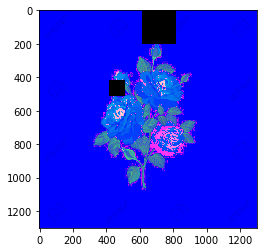

In [443]:
h = 201 
im=read_im('im3.jpg')
delete_rect(im,0,615,200,200)
delete_rect(im,415,415,100,100)
show_im(im)
#Pour éviter qu'il y ait des patchs carrément vides, il faut faire attention au quadrillage
#qu'on fait, selon les dimensions des parties supprimées
#la partie target doit au moins contenir quelques pixels non manquants
patches_missing, patches_complete = get_patches(im,201)
print("h= ",h)
print("Nombre de patchs ayant des pixels manquants: ",len(patches_missing))
print("Nombre de patchs complets: ",len(patches_complete))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Résultat: 


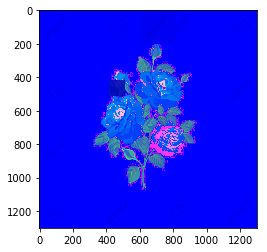

In [444]:
completed_patches = inpaintingVersCentre(patches_missing,patches_complete) 
imgR = reconstituer(completed_patches, im)
print("Résultat: ")
show_im(imgR)

En réponse à la question posée sur l'effet de l'ordre d'apprentissage, on dirait que oui. 

En effet, la partie qu'on va apprendre en premier lieu, nous servira pour l'apprentissage dans l'étape suivante. 
Et donc les nouveaux paramètres vont changer. 

Supposons que pour la première étape, les paramètres appris etaient très proches du bleu par exemple, cette couleur la
aura un poids encore plus grand lors de la seconde étape...

Image reconstituée en hsv: 


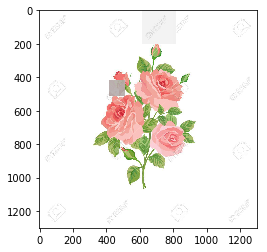

In [445]:
print("Image reconstituée en hsv: ")
imR = matplotlib.colors.hsv_to_rgb(imgR)
show_im(imR)

### Exemple 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


h=  101
Nombre de patchs ayant des pixels manquants:  4
Nombre de patchs complets:  20


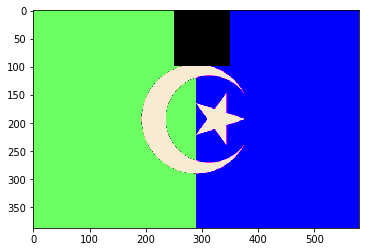

In [446]:
h = 101
im=read_im('dz.png')
delete_rect(im,0,251,100,100)
show_im(im)
#Pour éviter qu'il y ait des patchs carrément vides, il faut faire attention au quadrillage
#qu'on fait, selon les dimensions des parties supprimées
#la partie target doit au moins contenir quelques pixels non manquants
patches_missing, patches_complete = get_patches(im,h)
print("h= ",h)
print("Nombre de patchs ayant des pixels manquants: ",len(patches_missing))
print("Nombre de patchs complets: ",len(patches_complete))

Résultat: 


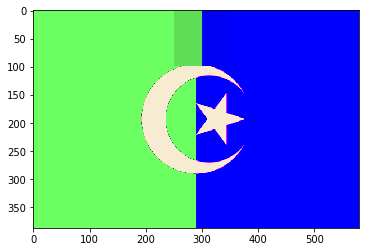

In [447]:
completed_patches = inpaintingVersCentre(patches_missing,patches_complete)
imgR = reconstituer(completed_patches, im)
print("Résultat: ")
show_im(imgR)

### Appentissage sur le voisinage 

Pour améliorer nos résultats, nous avons pensé à une heuristique qui est le VOISINAGE.
En effet, apprendre sur toute une image pourrait ne pas être la façon la plus optimale.
Les partie de l'image peuvent être très différentes. 

In [395]:
#Modification de la fonction approximer pour l'adapter à l'utlisation des voisins. 
def approximerPartie(patch, patches_complete, indexes_voisinage):   
    #Construire Ip et IpB :
    IpB =[]
    Ip = []
    y = []
    X =[]
    
    for index, element in np.ndenumerate(patch): 
        if(element != -100): 
            IpB.append(index)
            y.append(element)
        else:
            Ip.append(index)
     
    y= np.asarray(y)
    #print(y)
    #print("Y shape: ",y.shape[0])
    #print("ipb========>",IpB)
    for (i,j,l) in IpB: 
        #print("triple",(i,j,l))
        for k in indexes_voisinage : 
            #Vérification que les voisins sont des patchs complets. 
            if k in  patches_complete.keys():
                pk = patches_complete[k]
                X.append(pk[i][j][l])
                #print("done")
    X = np.asarray(X)
    #print("X",X)
    #print("X shape: ",X.shape)
    if (y.shape==0 or X.shape[0]==0): 
        print ("Attention à votre quadrillage")
        return
    
    Xnorm = X.reshape( y.shape[0],int(X.shape[0] / y.shape[0]) )
    lasso = linear_model.Lasso(alpha=0.01)

    lasso.fit(Xnorm, y)

    #print("len coeff", len(lasso.coef_))

    
    Xp = []
    for (i,j,l) in Ip: 
        #print("triple",(i,j,l))
        for k in indexes_voisinage : 
            if k in  patches_complete.keys():
                pk = patches_complete[k]
                Xp.append(pk[i][j][l])
    Xp = np.asarray(Xp)
    #print(X)
    #print("X shape: ",X.shape)
    Xpnorm = Xp.reshape(len(Ip),int(Xp.shape[0] / len(Ip)) )
    
    
    # complétion 
    yhat = []
    i=0
    for index, element in np.ndenumerate(patch): 
        #print("ici")
        if(element != -100 ): 
            yhat.append(element)
        
        else :
            
            yhat.append(Xpnorm[i].dot(lasso.coef_))
            #print("ind===========>",index)
            #print("yhat==========>",Xpnorm[i].dot(lasso.coef_))
            i+=1
  

    yhat = np.asarray(yhat)
    yhat = yhat.reshape(patch.shape[0],patch.shape[1],3)
    return yhat
    

In [410]:
#Fonction de débruitage. 
def inpaintingVoisinage(patches_missing,patches_complete,h):
    completed_patches = {}
    for key in patches_missing.keys():
        i,j = key 
        patch = patches_missing[key]
        #print("____",key)
        indexes_voisinage  = [(i-h,j-h), (i-h,j), (i-h,j+h) , (i,j-h), (i,j+h), (i+h,j-h),(i+h,j),(i+h,j+h)]
        #print(indexes_voisinage)
        completed_patches[key]=approximerPartie(patch, patches_complete, indexes_voisinage)
    return completed_patches

### Exemple 1 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


h=  50
Nombre de patchs avec des pixels manquants:  4
Nombre de patchs complets:  92


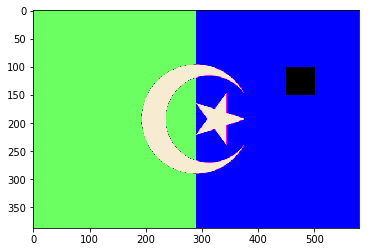

In [454]:
h = 50 
im=read_im('dz.png')
delete_rect(im,101,451,h,h)
show_im(im)
patches_missing, patches_complete = get_patches(im,h+1)
print("h= ",h)
print("Nombre de patchs avec des pixels manquants: ",len(patches_missing))
print("Nombre de patchs complets: ",len(patches_complete))

Résultat: 


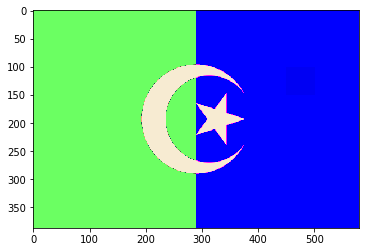

In [455]:
completed_patches = inpaintingVoisinage(patches_missing,patches_complete,h)
imgR = reconstituer(completed_patches, im)
print("Résultat: ")
show_im(imgR)

### Exemple 2 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


h=  50
Nombre de patchs avec des pixels manquants:  8
Nombre de patchs complets:  721


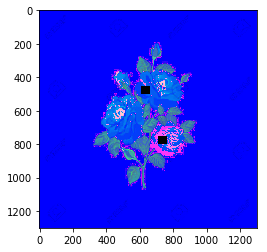

In [461]:
h = 50 
im=read_im('im3.jpg')
delete_rect(im,451,611,h,h)
delete_rect(im,751,711,h,h)
show_im(im)
patches_missing, patches_complete = get_patches(im,h+1)
print("h= ",h)
print("Nombre de patchs avec des pixels manquants: ",len(patches_missing))
print("Nombre de patchs complets: ",len(patches_complete))

Résultat: 


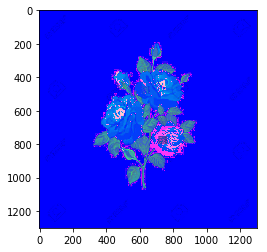

In [464]:
completed_patches = inpaintingVoisinage(patches_missing,patches_complete,h)
imgR = reconstituer(completed_patches, im)
show_im(imgR)
print("Résultat: ")

Même si l'image est essenssiellement bleue, l'algorithme a su estimer le rose quand il est dans son voisinage. 

Ci-dessous le même exemple sur l'algorithme décrit en premier lieu (le simple apprentissage).
Dans ce cas, le rose a été mal approximé. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


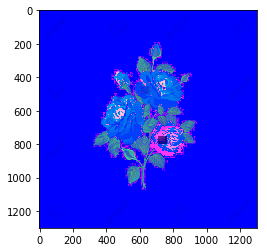

In [462]:
completed_patches = inpainting(patches_missing,patches_complete)
imgR = reconstituer(completed_patches, im)
show_im(imgR)